# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions!

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [2]:
login_df = pd.read_json('logins.json')
login_df.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [3]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# set index to datetime
login_df = login_df.set_index(['login_time'])

# create column for aggregation
login_df['count'] = 0

# resample in 15-minute intervals
login_df = login_df.resample('15T').count()

# create column for day of the week
login_df['day_of_week'] = login_df.index.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

login_df['day_of_week'] = login_df['day_of_week'].apply(lambda x: days[x])
login_df.head()

,count,day_of_week
login_time,,
1970-01-01 20:00:00,2,Thurs
1970-01-01 20:15:00,6,Thurs
1970-01-01 20:30:00,9,Thurs
1970-01-01 20:45:00,7,Thurs
1970-01-01 21:00:00,1,Thurs


In [5]:
def plot_login_by_day(df, day, ax=None):
    '''
    A function to plot login data by the day. 
    '''
    # create dataframe for day of the week
    day_df = df[df.day_of_week == day]
    
    # group data by hour and 15-minute interval
    day_grp = day_df.groupby([day_df.index.hour, day_df.index.minute]).sum()
    day_grp.index.set_names(['hour','min'], inplace=True)
    
    # set marker for weekday vs weekend
    if day in ['Sat','Sun']:
        mark = '--'
    else:
        mark = '-'
    # plot the data
    day_grp.plot(style=mark, legend=True, ax=ax)
    plt.xticks(np.arange(0, len(day_grp), 4), labels=range(len(day_grp)))
    plt.margins(0,.02)
    plt.xlabel('Time of Day')
    plt.ylabel('Login Count')

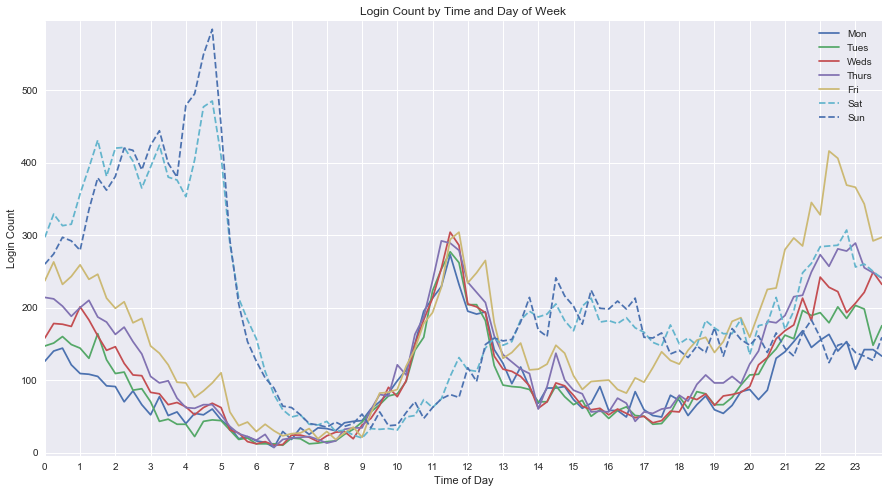

In [6]:
# plot daily login data
fig, ax = plt.subplots(figsize=(15,8))
[plot_login_by_day(login_df, day, ax) for day in days.values()]
plt.legend(days.values())
plt.title('Login Count by Time and Day of Week')
plt.show()

In [7]:
def total_by_day(df, day_col='day_of_week', ax=None):
    '''
    A function to plot the total number of logins
    by day of the week.
    
    df = dataframe
    day_col = name of column containing day of the week
    '''
    # group logins by day of the week
    day_grp = df.groupby(df[day_col]).sum()
    
    # plot login count by day of the week
    day_grp.loc[days.values()].plot(kind='bar',
                                    title='Total Logins by Day of Week',
                                    legend=False, 
                                    #figsize=(8,6),
                                    ax=ax
                                   )
    ax.set_xlabel(None)

In [8]:
def total_by_month(df, xticks=['Jan','Feb','Mar','Apr'], ax=None):
    '''
    A function to plot the total number of logins by month.
    xticks = a list of xtick labels
    '''
    df.groupby([df.index.month]).sum().plot(kind='bar',
                                            title='Total Logins by Month',
                                            ax=ax,
                                            legend=False,
                                            color='r'
                                            )
    ax.set_ylabel('Count')
    ax.set_xlabel(None)
    ax.set_xticklabels(xticks)

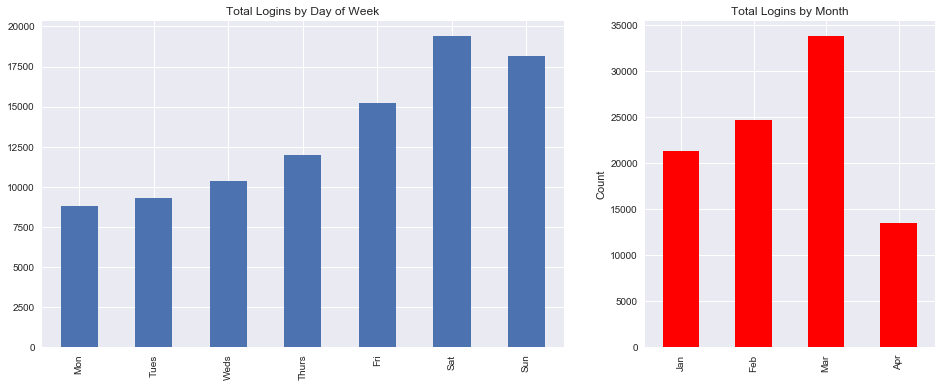

In [9]:
fig, ax = plt.subplots(1,2, figsize=(16,6), gridspec_kw = {'width_ratios':[1.8, 1]})
total_by_day(login_df, ax=ax[0])
total_by_month(login_df, ax=ax[1])
plt.show()

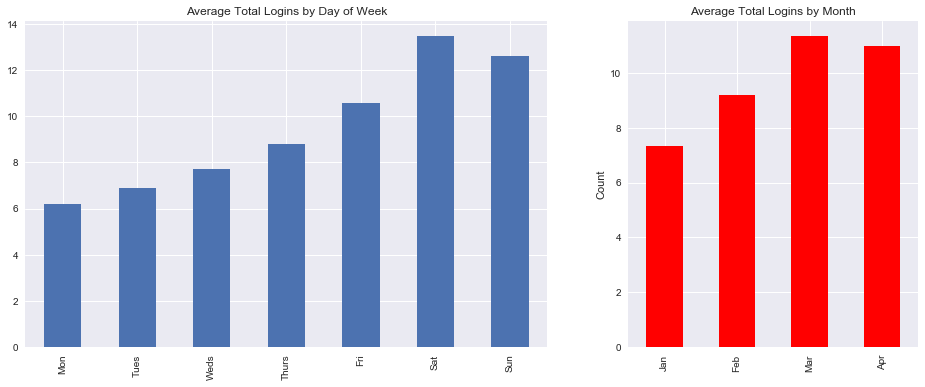

In [10]:
# plot the average logins by day and month
def total_by_day_avg(df, day_col='day_of_week', ax=None):
    '''
    A function to plot the total number of logins
    by day of the week.
    
    df = dataframe
    day_col = name of column containing day of the week
    '''
    # group logins by day of the week
    day_grp = df.groupby(df[day_col]).mean()
    
    # plot login count by day of the week
    day_grp.loc[days.values()].plot(kind='bar',
                                    title='Average Total Logins by Day of Week',
                                    legend=False, 
                                    #figsize=(8,6),
                                    ax=ax
                                   )
    ax.set_xlabel(None)
    
def total_by_month_avg(df, xticks=['Jan','Feb','Mar','Apr'], ax=None):
    '''
    A function to plot the total number of logins by month.
    xticks = a list of xtick labels
    '''
    df.groupby([df.index.month]).mean().plot(kind='bar',
                                            title='Average Total Logins by Month',
                                            ax=ax,
                                            legend=False,
                                            color='r'
                                            )
    ax.set_ylabel('Count')
    ax.set_xlabel(None)
    ax.set_xticklabels(xticks)
    
fig, ax = plt.subplots(1,2, figsize=(16,6), gridspec_kw = {'width_ratios':[1.8, 1]})
total_by_day_avg(login_df, ax=ax[0])
total_by_month_avg(login_df, ax=ax[1])
plt.show()

In [11]:
print('Login data begins: {0}\nLogin data ends: {1}'.format(login_df.index.min(), login_df.index.max()))

Login data begins: 1970-01-01 20:00:00
Login data ends: 1970-04-13 18:45:00


### Insights
We can see a few trends from the plots above. First, there appear to be three peak times for logins:
1. Mid-day on weekdays (around 11:30 AM)
1. Early morning on weekends (around 4:45 AM)
1. Late night every day, especially Friday (between 9:30 and 11:30 PM)

Second, the total and average number of logins increases throughout the week with the lowest number being on Monday and the peak on Saturday. Finally, the total and average number of logins seems to be increasing from month to month. However, we only have 13 days worth of data for April, so our data in incomplete.

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

**What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

We can split the drivers into two groups: Gotham and Metropolis. Then we can classify each trip before the toll policy change as either inter-city or intra-city. This can be defined as follows:
* intra-city: driver partner stays in respective city
* inter-city: driver partner starts and or finishes in the other city

Since drivers tend to be exclusive to their respective city, we would expect most of the rides to be intra-city before the toll change. The metric of success would be a significant increase in the number of inter-city rides. This would indicate that the toll policy change resulted in more driver partners crossing the bridge.  

**Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**

An A/B test could be conducted where a subgroup of driver partners from each city are chosen for a pilot program offering a reimbursement of toll fees (group A), while the control group recieves no change in toll policy (group B). After a period of time, the mean number of inter-city rides by driver would be calculated. We want to measure whether group A saw an increase in the mean number of inter-city rides compared to group B. Hypothesis testing with boostrap analysis and t-tests could be used to measure the significance of the observation, with the null hypothesis being that there is no difference in the mean number of inter-city rides by driver. We would reject the null hypothesis and assume a significant increase in inter-city rides if the difference in means has a p-value at or above 0.05. 

At this point, we would want to measure the potential finanicial impact of waving the toll fees for all drivers by calculating profit from the rides minus the toll fee. This could be done by calculating the profit margin from group A's increased inter-city rides compared to group B. Again, hypothesis testing can be used to see if there is in fact an increase in the mean profit margin. If a significant increase is found, we would recommend to the city operations team that they expand the pilot program to include more or possibly all drivers. They may wish, however, to treat this as a limited-time program in order to continue testing the change in profit margins. If it is found that the program is having a negative impact on profits, driver satisfaction, or other key metrics, then it can be terminated at the stated termination date without the backlash of an unannounced policy change. If however, there is found to be a positive impact, the policy can be extended indefinitely.

The amount of time for the initial A/B or policy expansion may be subjective and should be approached thoughtfully. If too little time is given to the experiment, it may not give driver partners enough time to adapt to the change and potential revenue increases may not be observed. If too much time is given and the experiment is proven unsuccessful, it may result in lost revenue.

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm
rider retention (again, a few sentences will suffice).

### Data description
* `city`: city this user signed up in
* `phone`: primary device for this user
* `signup_date`: date of account registration; in the form ‘YYYY MM DD’
* `last_trip_date`: the last time this user completed a trip; in the form ‘YYYY MM DD’
* `avg_dist`: the average distance in miles per trip taken in the first 30 days after signup
* `avg_rating_by_driver`: the rider’s average rating over all of their trips
* `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips
* `surge_pct`: the percent of trips taken with surge multiplier > 1
* `avg_surge`: The average surge multiplier over all of this user’s trips
* `trips_in_first_30_days`: the number of trips this user took in the first 30 days after signing up
* `ultimate_black_user`: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* `weekday_pct`: the percent of the user’s trips occurring during a weekday

In [75]:
# import libraries
import json
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost as xgb
from yellowbrick.classifier import ConfusionMatrix

In [13]:
# load json file into dataframe
with open('ultimate_data_challenge.json') as file:
    ultimate = json.load(file)
    
ultimate_df = pd.DataFrame(ultimate)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
# parse datetime columns
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df.last_trip_date, infer_datetime_format=True)
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df.signup_date, infer_datetime_format=True)

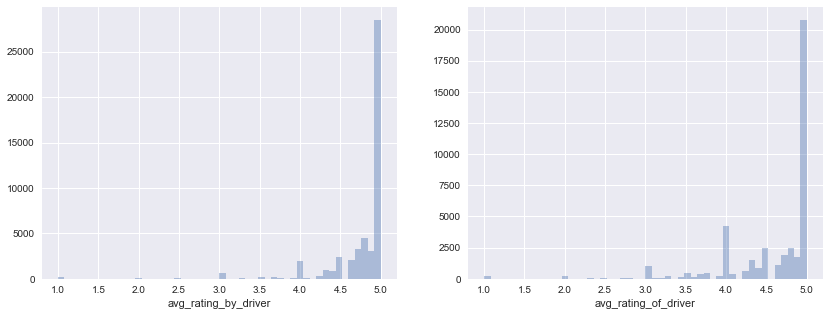

In [15]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.distplot(ultimate_df.avg_rating_by_driver.dropna(), kde=False, ax=ax[0])
sns.distplot(ultimate_df.avg_rating_of_driver.dropna(), kde=False, ax=ax[1])

In [16]:
# fill missing average ratings with median value
ultimate_df.avg_rating_by_driver.fillna(ultimate_df.avg_rating_by_driver.median(), inplace=True)
ultimate_df.avg_rating_of_driver.fillna(ultimate_df.avg_rating_of_driver.median(), inplace=True)

#fill missing phone with 'unknown'
ultimate_df.phone.fillna('unknown', inplace=True)

In [19]:
# convert city and phone columns to categorical
ultimate_df.city = ultimate_df.city.astype('category')
ultimate_df.phone =  ultimate_df.phone.astype('category')

In [20]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.6 MB


In [21]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### 3.1 Exploratory Data Analysis

In [23]:
def set_active_status(df, last_active):
    '''
    A function to create a column indicating the active
    status of a user in the last 30 days.
    1 = active, 0 = inactive
    
    last_active = column containing users last active date
    '''
    # set date that data was pulled
    pull_date = df[last_active].max()
    
    # create column to define users active in last 30 day
    for i in range(len(df)):
        diff = (pull_date - df.loc[i, last_active]).days
        if diff <= 30:
            df.loc[i, 'active'] = 1
        else:
            df.loc[i, 'active'] = 0
    
    # set dtype to integer
    df.active = df.active.astype(int)
        
set_active_status(ultimate_df, 'last_trip_date')

In [24]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [98]:
# convert signup_date to categorical feature
ultimate_df.signup_date = ultimate_df.signup_date.astype('category')

In [109]:
ultimate_train=ultimate_df.sample(frac=0.67, random_state=42)
ultimate_test=ultimate_df.drop(ultimate_train.index)

In [53]:
# compute percent of retained users
retained = ultimate_train.active.sum() / ultimate_train.active.count()
print('{:.2f}% of users have been retained.'.format(retained * 100))

37.79% of users have been retained.


In [54]:
# create dataframe of total number of users and active users by phone
active_by_phone = pd.DataFrame([ultimate_train.groupby('phone')['active'].sum(), ultimate_train.groupby('phone')['active'].count()]).T
active_by_phone.columns = ['active','total']

# calculate percent of active users by phone
active_by_phone['pct_active'] = round((active_by_phone.active / active_by_phone.total), 4) * 100
active_by_phone

,active,total,pct_active
phone,,,
Android,2112,10078,20.96
iPhone,10453,23160,45.13
unknown,93,262,35.50


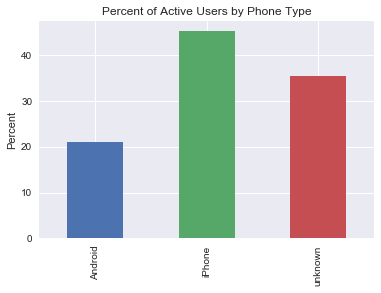

In [55]:
active_by_phone.pct_active.plot(kind='bar', 
                                title='Percent of Active Users by Phone Type')
plt.ylabel('Percent')
plt.xlabel(None)
plt.show()

In [56]:
# compute mean average surge multiplier by active status
ultimate_train.groupby('active')['avg_surge'].mean()

active
0    1.074097
1    1.073370
Name: avg_surge, dtype: float64

Text(0.5, 1.0, 'Average Surge Multiplier by Active Status')

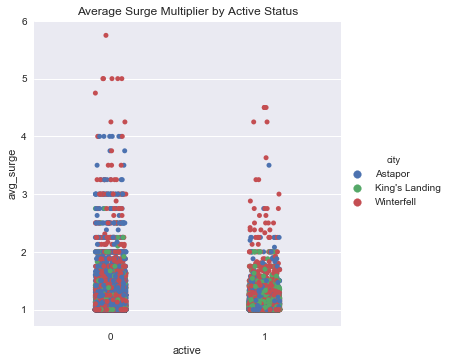

In [58]:
sns.catplot(x='active', y='avg_surge', hue='city', data=ultimate_train)
plt.title('Average Surge Multiplier by Active Status')

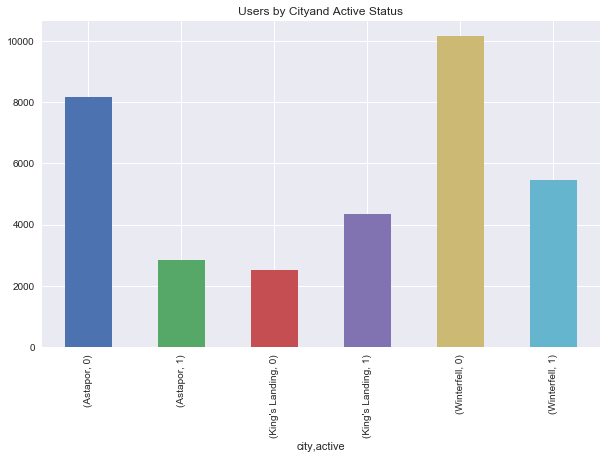

In [112]:
city_active = ultimate_train.groupby(['city','active'])['avg_dist'].count()
city_active.plot(kind = 'bar', title='Users by Cityand Active Status', figsize=(10,6))
plt.show()

In [118]:
city_active = city_active.unstack()
city_active.columns = ['inactive', 'active']
city_active['pct_retained'] = city_active.active / (city_active.active + city_active.inactive)
city_active

,inactive,active,pct_retained
city,,,
Astapor,8179,2853,0.258611
King's Landing,2520,4339,0.632600
Winterfell,10143,5466,0.350183


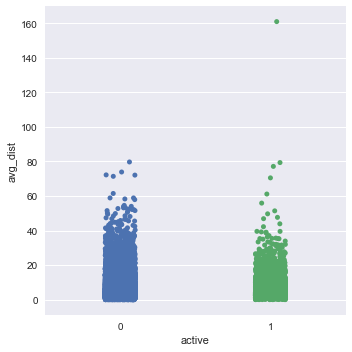

In [59]:
sns.catplot(x='active', y='avg_dist', data=ultimate_train)

In [62]:
ultimate_train.groupby('active')['avg_dist'].mean()

active
0    6.231335
1    5.111653
Name: avg_dist, dtype: float64

In [63]:
ultimate_train.groupby('active')['avg_dist'].std()

active
0    6.222086
1    4.709922
Name: avg_dist, dtype: float64

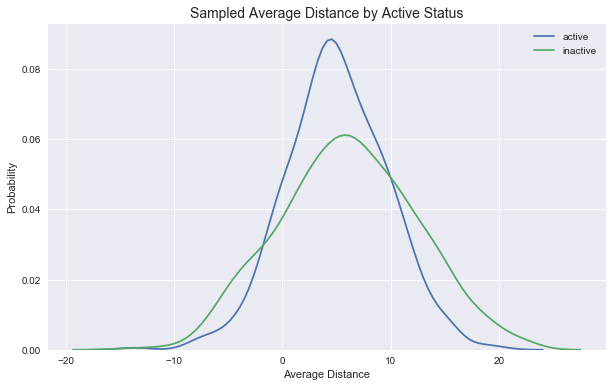

In [64]:
# plot normed distributions of active vs inactive based on avg_dist
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(np.random.normal(5.11, 4.71, 1000), hist=False, label='active', ax=ax)
sns.distplot(np.random.normal(6.23, 6.22, 1000), hist=False, label='inactive', ax=ax)
ax.set_title('Sampled Average Distance by Active Status', fontsize=14)
ax.set_xlabel('Average Distance')
ax.set_ylabel('Probability')
plt.legend()

In [73]:
ultimate_train.groupby('active')['ultimate_black_user'].sum() / ultimate_train.groupby('active')['ultimate_black_user'].count()

active
0    0.297908
1    0.507979
Name: ultimate_black_user, dtype: float64

#### Insights
* 37.79% of users have been retained
* iPhone users (45.13%) are retained at a rate twice as high as Android users (20.96%)
* Winterfell experienced the highest surge rate
* King's Landing (63.3%) had the highest retention percentage followed by Winterfell (35.0%) and Astapor (25.9%)
* Users with average surge rates above 4.5 are unlikely to be retained
* Ultimate Black Users were more likely to be retained (50.80% vs 29.79%)

### 3.2 Predictive Model
Since we are not dealing with an overly imbalanced dataset, we will first validate our model performance using accuracy on the test set that was set aside. In order to differentiate model performance in later models, we will also calculate a confusion matrix and assess precision and recall scores. 

In [103]:
# one-hot encoding for categorical features
ultimate_train = pd.get_dummies(ultimate_train, columns=['city','phone','ultimate_black_user'])
ultimate_test = pd.get_dummies(ultimate_test, columns=['city','phone','ultimate_black_user'])

In [69]:
ultimate_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
33553,3.42,4.7,3.8,1.00,Winterfell,2014-06-21,iPhone,2014-01-10,0.0,1,True,60.0,1
9427,3.21,5.0,4.8,1.00,Astapor,2014-06-17,iPhone,2014-01-15,0.0,0,True,75.0,1
199,4.58,5.0,5.0,1.00,Winterfell,2014-05-16,iPhone,2014-01-16,0.0,0,False,100.0,0
12447,2.94,5.0,5.0,1.50,Astapor,2014-02-02,Android,2014-01-27,50.0,2,False,0.0,0
39489,2.74,4.8,4.8,1.03,Astapor,2014-05-27,Android,2014-01-05,11.1,0,False,55.6,0


In [104]:
# create training data label and feature arrays
y_train = ultimate_train.active.values
X_train = ultimate_train.drop(['last_trip_date', 'active'], axis=1).values

# create test data label and feature arrays
y_test = ultimate_test.active.values
X_test = ultimate_test.drop(['last_trip_date', 'active'], axis=1).values

#### Logistic Regression
Logistic regression will be used as our baseline model as it is computationally inexpensive. 

In [124]:
# instantiate classifier
clf = LogisticRegression(solver='liblinear')

# Fit the model on the trainng data.
clf.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(clf.score(X_test, y_test))

0.6275151515151515
0.6275151515151515


Next, we will compare a few ensemble methods as they will likely improve model performace. After computing a baseline score, grid search with cross-validation will be used to optimize hyperparamet tuning.

#### AdaBoost
We will start with the first of the successful ensemble methods as a baseline. 

In [136]:
# instantiate classifier
ada = AdaBoostClassifier(random_state=42)

# fit the model
ada.fit(X_train, y_train)

# print the accuracy score
ada.score(X_test, y_test)

0.7853939393939394

In [140]:
# grid search for hyperparameter tuning
ada_param_grids = {'n_estimators':[5, 100, 250],
               'learning_rate':[0.01, 0.1, 1.0]
               }
ada_cv = GridSearchCV(ada, param_grid=ada_param_grids, cv=5)
ada_cv.fit(X_train,y_train)

#print the best model accuracy
print('Best score:{}'.format(ada_cv.best_score_))

# print the best model hyperparameter inputs
print(ada_cv.best_estimator_)

Best score:0.7816119402985074
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=42)


In [139]:
# instantiate new model
ada2 = AdaBoostClassifier(n_estimators=250, random_state=42)

# fit the model
ada2.fit(X_train, y_train)

# print accuracy
ada2.score(X_test, y_test)

0.7868484848484848

In [145]:
# print classification report
ada2_preds = ada2.predict(X_test)
print(classification_report(y_test, ada2_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     10354
           1       0.75      0.65      0.69      6146

   micro avg       0.79      0.79      0.79     16500
   macro avg       0.78      0.76      0.77     16500
weighted avg       0.78      0.79      0.78     16500



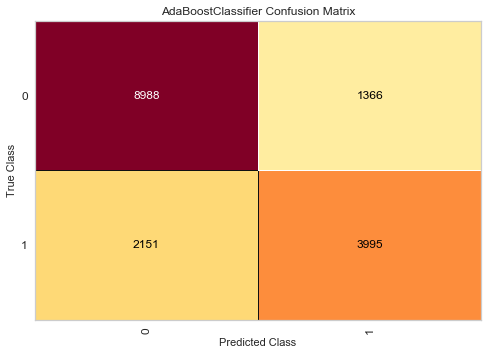

In [144]:
# create confusion matrix
ada_model = AdaBoostClassifier(n_estimators=250, random_state=42)
ada_cm = ConfusionMatrix(ada_model)
ada_cm.fit(X_train, y_train)
ada_cm.score(X_test, y_test)
ada_cm.poof()

#### Gradient Boosting
Next, we will move to gradient boosting as we are likely to see improved results.

In [132]:
# instantiate the classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

# print the accuracy score
gbc.score(X_test, y_test)

0.7856363636363637

In [129]:
# Grid search hyperparameters
param_grids = {'max_depth':[3,10,15],
               'n_estimators':[10, 100, 250],
               'subsample':[0.01, 0.1, 1.0],
               'learning_rate':[0.001, 0.01, 0.1]
               }
gbc_cv = GridSearchCV(gbc, param_grid=param_grids, cv = 5)
gbc_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15], 'n_estimators': [10, 100, 250], 'subsample': [0.001, 0.01, 0.1, 1.0], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
# print the best accuracy score from the grid search models
print('Best score:{}'.format(gbc_cv.best_score_))

# print the hyperparameter inputs for the best model
print(gbc_cv.best_estimator_)

Best score:0.7886865671641791
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [131]:
# continue hyperparameter tuning 
gbc_cv = GridSearchCV(gbc, param_grid={'max_depth':[1,3,5], 'n_estimators':[250, 350, 500]}, cv = 5)
gbc_cv.fit(X_train,y_train)
print('Best score:{}'.format(gbc_cv.best_score_))
print(gbc_cv.best_estimator_)

Best score:0.7894328358208955
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [167]:
# final tested gradient boosting model
gbc2 = GradientBoostingClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)
gbc2.score(X_test, y_test)

0.792060606060606

In [142]:
# print classification report
gbc2_preds = gbc2.predict(X_test)
print(classification_report(y_test, gbc2_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84     10354
           1       0.75      0.67      0.71      6146

   micro avg       0.79      0.79      0.79     16500
   macro avg       0.78      0.77      0.77     16500
weighted avg       0.79      0.79      0.79     16500



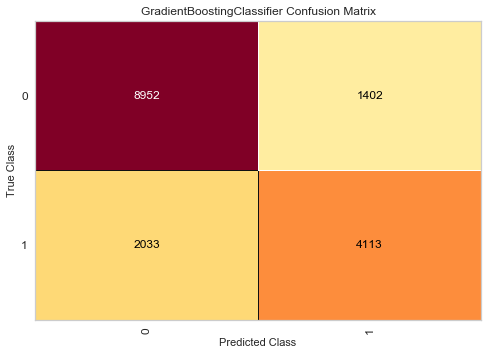

In [143]:
# create confusion matrix
model = GradientBoostingClassifier(n_estimators=500, random_state=42).fit(X_train, y_train)
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

#### XGBoost
We will build upon gradient boosting with extreme gradient boosting (XGBoost), which, in addition to potential improved model performance, also has the benefit of increased execution speed (if the model needed to be scaled). 

In [164]:
# instantiate the model
matrix = xgb.DMatrix(data=X_train,label=y_train)
xgb_reg = xgb.XGBClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)

# make predictions on test set
xgb_preds = xgb_reg.predict(X_test)

# print classification report
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     10354
           1       0.74      0.67      0.71      6146

   micro avg       0.79      0.79      0.79     16500
   macro avg       0.78      0.77      0.77     16500
weighted avg       0.79      0.79      0.79     16500



In [165]:
# print XGBoost accuracy
accuracy_score(y_test, xgb_preds)

0.7922424242424242

In [170]:
# compute grid search
xgb_param_grids = {'max_depth':[3,10,15],
               'n_estimators':[750, 1000, 1250],
               'subsample':[0.5, 1.0]
               }
matrix = xgb.DMatrix(data=X_train,label=y_train)
xgb_reg = xgb.XGBClassifier(num_parallel_trees=-1, random_state=42)
xgb_cv = GridSearchCV(xgb_reg, param_grid=xgb_param_grids, cv = 5)
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_parallel_trees=-1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 10, 15], 'n_estimators': [750, 1000, 1250], 'subsample': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [171]:
# print best model accuracy and parameters
print('Best score:{}'.format(xgb_cv.best_score_))
print(xgb_cv.best_estimator_)

Best score:0.7893134328358209
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1250,
       n_jobs=1, nthread=None, num_parallel_trees=-1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1.0)


In [173]:
# instantiate the model
matrix = xgb.DMatrix(data=X_train,label=y_train)
xgb_reg = xgb.XGBClassifier(n_estimators=1250, random_state=42).fit(X_train, y_train)

# make predictions on test set
xgb_preds = xgb_reg.predict(X_test)

# print XGBoost accuracy
print(accuracy_score(y_test, xgb_preds))

# print classification report
print(classification_report(y_test, xgb_preds))

0.7921818181818182
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     10354
           1       0.75      0.67      0.71      6146

   micro avg       0.79      0.79      0.79     16500
   macro avg       0.78      0.77      0.77     16500
weighted avg       0.79      0.79      0.79     16500



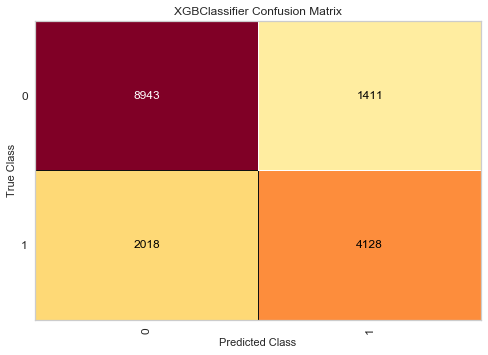

In [175]:
xgb_model = xgb.XGBClassifier(n_estimators=1250, random_state=42)
xgb_cm = ConfusionMatrix(xgb_model)
xgb_cm.fit(X_train, y_train)
xgb_cm.score(X_test, y_test)
xgb_cm.poof()

#### Conclusion
As expected, XGBoost produced the best model when validated using accuracy (79.2%), precision (82% of retainment), and recall (67% attrition). Precision and recall are of particular interest in validating our model as they give a sense of how well the model is able to provide us with relevant results. The model is able to recall 86% of retained users and 67% of inactive users with a precision of 82% and 75% respectively. This model slightly sacrifices the accuracy of predicting retained users at the expense of more accurately predicting inactive users. Ultimate Technologies could use this model to find trends in attrition by extracting feature importance from the model and using hypothesis testing to confirm correlation. The company could then use the model to 1) identify those customers that were likely to become inactive and provide them with incentive to remain active, and 2) find ways to improve the overall service and retention rate.

Moving forward, we might be able to further improve the model by taking advantage of XGBoost's regularization feature. This could help produce a more accurate model by reducing overfitting to the training data. 